In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
class LDA_T:
    def __init__(self, n_components):
        self.n_components = n_components
        self.W = []
        
    def fit(self, X):
        """
        X: Tuple of features vectors (NxM) of each class
        """
        
        num_class = len(X)
        assert self.n_components < num_class, 'n_component must lower than number of classes'

        self.W = []
        
        # calc mean of all class
        u = np.concatenate(X).mean(axis=0, keepdims=True)

        # calc S_B and S_W
        S_B = 0
        S_W = 0
        for x in X:
            # calc mean of each class
            mean_x = x.mean(axis=0, keepdims=True)
            # 
            d_i = x - mean_x
            S_W += np.dot(d_i.T, d_i)
            #
            mean_x -= u
            S_B += x.shape[0] * (np.dot(mean_x.T, mean_x))

        # calc W = S_W^-1 * S_B
        W = np.linalg.inv(S_W).dot(S_B)

        # calc eigenvalues and eigenvector
        eigenvalues, eigenvectors = np.linalg.eig(W)

        # sort and select largest target_d vectors
        idx = eigenvalues.argsort()[::-1]
        eigenvectors = eigenvectors[:, idx]

        # projection matrix
        self.W = eigenvectors[:, :self.n_components]

        return self 
    
    def transform(self, X):
        return np.dot(X, self.W)

In [20]:
from sklearn import datasets

iris = datasets.load_iris()

In [21]:
X = iris.data
Y = iris.target
target_names = iris.target_names

In [22]:
X_train = [X[Y == i] for i in range(len(target_names))]

In [23]:
lda = LDA_T(n_components=2)
lda.fit(X_train)
X_r = list(map(lda.transform, X_train))

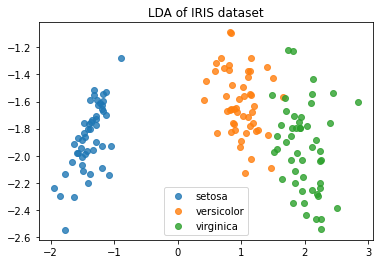

In [24]:
plt.figure()

for X_t, name in zip(X_r, target_names):
    plt.scatter(X_t[:, 0], X_t[:, 1], label=name, alpha=.8)  
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.show()
